# SIMUL RSLT (1-Iter)

In [53]:
import eptstgcn
import torch
import eptstgcn.planner

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns

```python
plans_stgcn = {
    'max_iteration': 1,   # 30, 
    'method': ['EPT-STGCN'], 
    'lags': [4, 8, 12],  
    'nof_filters': [16, 32, 64], 
    'epoch': [50, 100, 150]
}
```

In [29]:
# ver1_50epoch = eptstgcn.load_data('./simul_model2/stgcn_v1_50epoch.pickle')
# ver1_100epoch = eptstgcn.load_data('./simul_model2/stgcn_v1_100epoch.pickle')
# ver1_150epoch = eptstgcn.load_data('./simul_model2/stgcn_v1_150epoch.pickle')

# ver2_50epoch = eptstgcn.load_data('./simul_model2/stgcn_v2_50epoch_.pickle')
# ver2_100epoch = eptstgcn.load_data('./simul_model2/stgcn_v2_100epoch.pickle')
# ver2_150epoch = eptstgcn.load_data('./simul_model2/stgcn_v2_150epoch.pickle')

## + data normalization
# ver1_50_nor = eptstgcn.load_data('./simul_model2/normal/stgcn_v1_50epoch.pickle')
# ver1_100_nor = eptstgcn.load_data('./simul_model2/normal/stgcn_v1_100epoch.pickle')
# ver1_150_nor = eptstgcn.load_data('./simul_model2/normal/stgcn_v1_150epoch.pickle')

# ver2_50_nor = eptstgcn.load_data('./simul_model2/normal/stgcn_v2_50epoch_.pickle')
# ver2_100_nor = eptstgcn.load_data('./simul_model2/normal/stgcn_v2_100epoch.pickle')
# ver2_150_nor = eptstgcn.load_data('./simul_model2/normal/stgcn_v2_150epoch.pickle')

In [43]:
## ver1
# a_ = ver1_50epoch.simulation_results
# a_.insert(2, 'normal' , ['X']*9)
# b_ = ver1_100epoch.simulation_results
# b_.insert(2, 'normal' , ['X']*9)
# c_ = ver1_150epoch.simulation_results
# c_.insert(2, 'normal' , ['X']*9)
# a__ = ver1_50_nor.simulation_results
# b__ = ver1_100_nor.simulation_results
# c__ = ver1_150_nor.simulation_results


## ver2
# a2_ = ver2_50epoch.simulation_results
# b2_ = ver2_100epoch.simulation_results
# c2_ = ver2_150epoch.simulation_results

# a2__ = ver2_50_nor.simulation_results
# b2__ = ver2_100_nor.simulation_results
# c2__ = ver2_150_nor.simulation_results

# rslt = pd.concat([a_,b_,c_, a__, b__, c__, a2_, b2_, c2_, a2__, b2__, c2__])

In [45]:
# rslt.to_csv('./simulation_results/simul_rlst.csv', index=False)

In [47]:
rslt = pd.read_csv('./simulation_results/simul_rlst.csv')

In [48]:
rslt

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,data2,STGCN,X,4,16,50,0.182058,0.167798,299.051996
1,data2,STGCN,X,4,32,50,0.201436,0.188044,305.620220
2,data2,STGCN,X,4,64,50,0.191472,0.174166,316.454904
3,data2,STGCN,X,8,16,50,0.192159,0.173960,304.476469
4,data2,STGCN,X,8,32,50,0.205647,0.177749,309.493689
...,...,...,...,...,...,...,...,...,...
103,data2,EPT-STGCN,O,8,32,150,0.196512,0.188642,931.657403
104,data2,EPT-STGCN,O,8,64,150,0.184796,0.175644,962.807430
105,data2,EPT-STGCN,O,12,16,150,0.183245,0.173610,937.009531
106,data2,EPT-STGCN,O,12,32,150,0.184576,0.173852,972.509811


In [60]:
rslt[rslt['mse(test)'] == min(rslt['mse(test)'])]

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
55,data2,EPT-STGCN,X,4,32,50,0.180856,0.159167,298.478652


## lag=4, epoch=50

In [69]:
rslt.query('lags==4 and nof_filters==16 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,data2,STGCN,X,4,16,50,0.182058,0.167798,299.051996
27,data2,STGCN,O,4,16,50,0.181886,0.170189,301.377795
54,data2,EPT-STGCN,X,4,16,50,0.186759,0.163494,295.127900
81,data2,EPT-STGCN,O,4,16,50,0.191065,0.178842,295.075789


In [68]:
rslt.query('lags==4 and nof_filters==32 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
1,data2,STGCN,X,4,32,50,0.201436,0.188044,305.620220
28,data2,STGCN,O,4,32,50,0.198904,0.190715,296.457600
55,data2,EPT-STGCN,X,4,32,50,0.180856,0.159167,298.478652
82,data2,EPT-STGCN,O,4,32,50,0.180618,0.166902,298.276487


In [70]:
rslt.query('lags==4 and nof_filters==64 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
2,data2,STGCN,X,4,64,50,0.191472,0.174166,316.454904
29,data2,STGCN,O,4,64,50,0.195493,0.188309,308.646654
56,data2,EPT-STGCN,X,4,64,50,0.190731,0.175991,307.732803
83,data2,EPT-STGCN,O,4,64,50,0.185092,0.174121,307.609691


## lag=8, epoch=50

In [71]:
rslt.query('lags==8 and nof_filters==16 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
3,data2,STGCN,X,8,16,50,0.192159,0.173960,304.476469
30,data2,STGCN,O,8,16,50,0.189424,0.177908,303.527294
57,data2,EPT-STGCN,X,8,16,50,0.202791,0.174041,305.746121
84,data2,EPT-STGCN,O,8,16,50,0.188840,0.173830,304.973405


In [72]:
rslt.query('lags==8 and nof_filters==32 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
4,data2,STGCN,X,8,32,50,0.205647,0.177749,309.493689
31,data2,STGCN,O,8,32,50,0.213567,0.208104,307.255326
58,data2,EPT-STGCN,X,8,32,50,0.197390,0.169384,306.544829
85,data2,EPT-STGCN,O,8,32,50,0.213520,0.206142,308.734710


In [74]:
rslt.query('lags==8 and nof_filters==64 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
5,data2,STGCN,X,8,64,50,0.193967,0.170748,320.984409
32,data2,STGCN,O,8,64,50,0.190067,0.175568,319.699453
59,data2,EPT-STGCN,X,8,64,50,0.206705,0.176656,322.366115
86,data2,EPT-STGCN,O,8,64,50,0.194730,0.184389,317.388223


## lag=12, epoch=50

In [76]:
rslt.query('lags==12 and nof_filters==16 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
6,data2,STGCN,X,12,16,50,0.201442,0.177695,315.960462
33,data2,STGCN,O,12,16,50,0.189747,0.180983,315.895220
60,data2,EPT-STGCN,X,12,16,50,0.205929,0.175041,311.189126
87,data2,EPT-STGCN,O,12,16,50,0.184434,0.175556,311.789555


In [77]:
rslt.query('lags==12 and nof_filters==32 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
7,data2,STGCN,X,12,32,50,0.191433,0.177609,317.608783
34,data2,STGCN,O,12,32,50,0.201539,0.201505,320.217695
61,data2,EPT-STGCN,X,12,32,50,0.202787,0.175517,320.403812
88,data2,EPT-STGCN,O,12,32,50,0.200415,0.192586,316.290751


In [78]:
rslt.query('lags==12 and nof_filters==64 and epoch==50')

,dataset,method,normal,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
8,data2,STGCN,X,12,64,50,0.195411,0.177827,327.971840
35,data2,STGCN,O,12,64,50,0.193679,0.187321,322.395950
62,data2,EPT-STGCN,X,12,64,50,0.214775,0.180072,326.717989
89,data2,EPT-STGCN,O,12,64,50,0.189591,0.177227,325.705265


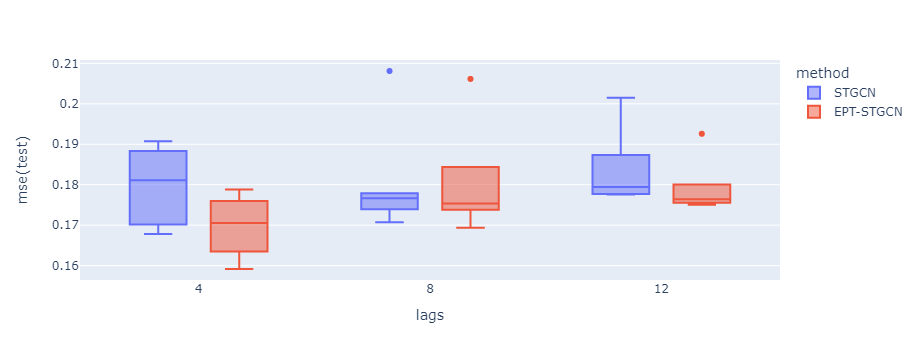

In [87]:
rslt.query("epoch==50").plot.box(backend='plotly',x='lags',color='method',y='mse(test)')

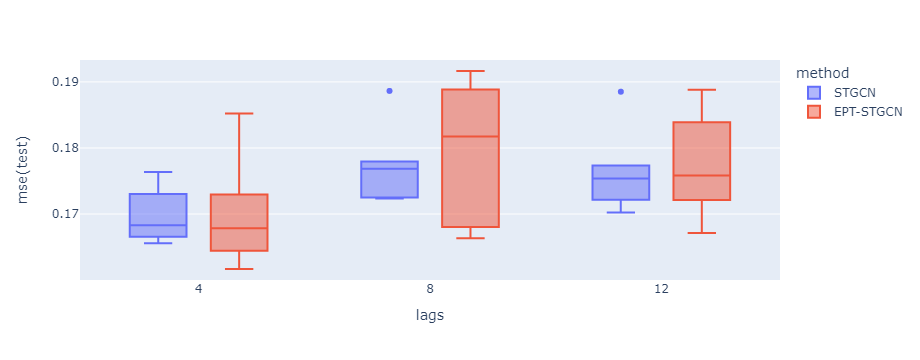

In [91]:
rslt.query("epoch==100").plot.box(backend='plotly',x='lags',color='method',y='mse(test)')

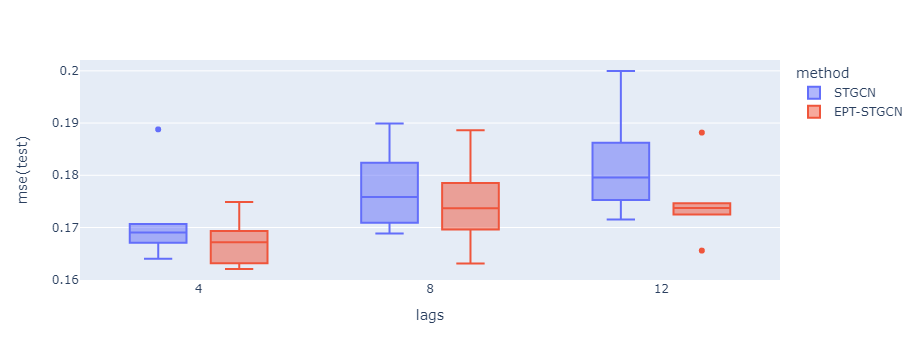

In [92]:
rslt.query("epoch==150").plot.box(backend='plotly',x='lags',color='method',y='mse(test)')

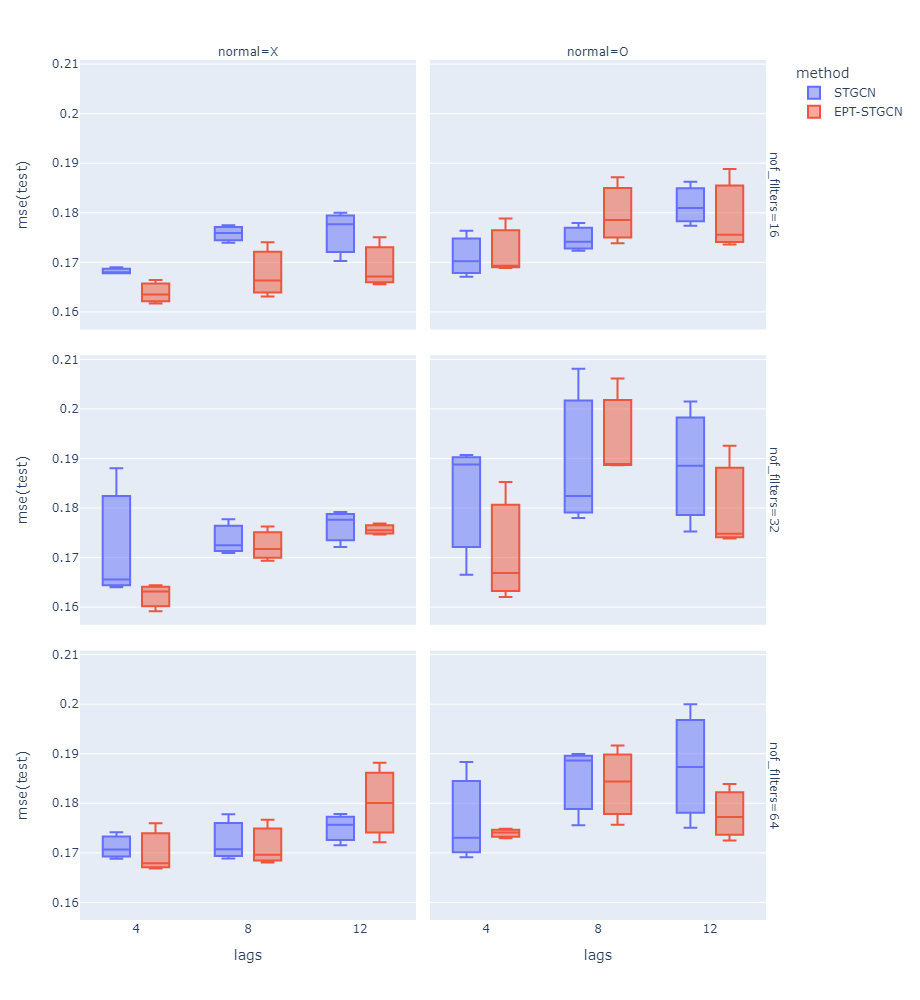

In [90]:
rslt.plot.box(backend='plotly',x='lags',color='method',y='mse(test)', facet_col='normal',facet_row='nof_filters', height=1000)

- 아직 결과 비교가 어려움. (적어도 30이상은 되어야 함. 중심극한정리 처럼..)
- 만약 24lag에서 결과가 좋으면 주기가 24시간과 연결시키면 될 것.
- 전체적으로 어떤 모델의 결과가 좋은데 어떤 조건 어떤 조건일 때가 최적이고, 이런 이런 조건에서는 오히려~~가 더 좋더라.. 이런식으로

- 만약 필터가 많았을 때 결과가 좋다면, 좋은성능의 원인은 필터의 수가 많음일 지도.. (이 모델이 잘 맞춘다기 보다는 그냥 필터의 능력일지도)
- top (cpu 사용량 확인) -- 잘 돌아가고 있나

- 경로수정필요